In [1]:
import glob
import pandas as pd

import matplotlib.pyplot as plt
import contextily as ctx

# DHI libs
import mikeio

# ignore warnings (as they can get annoying with mikeio pre-release versions)
import warnings
warnings.filterwarnings("ignore")

# check out versions (using common version 0.12.2 here instead of dev version)
mikeio.__version__

'0.12.2'

In [2]:
# helper functions
def annotate_scatterplot(df, x='x', y='y', acol='name', c='w', fs=12, fw='normal', rot=45):
    """
    takes a dataframe and annotates x, y coordinates of scatterplot for axis ax
    """
    # loop throgh all rows of dataframe
    for i, point in df.iterrows():
        ax.text(point[x], point[y], str(point[acol]), 
        color=c, fontsize=fs, fontweight=fw, rotation=rot)

# Compare multiple setups

In this example the focus lies on **meshing**. Hence comparing mesh Element numbers and results

In [3]:
# specify setup folder and suffix to look for
setupfold = 'D:\mesh_calib\setups\*.m21fm'

# get all setups from folder
setups = glob.glob(setupfold)
setups

['D:\\mesh_calib\\setups\\0_Prerun_for_initial_conditions.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_newmesh.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_newmesh2.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_newmesh2deepened.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_newmesh3.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_newmesh3_deepened.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_triagmesh.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_triagmesh2_excl.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_triagmesh2_incl.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_triagmesh2_straightened.m21fm',
 'D:\\mesh_calib\\setups\\1_OpCIS_Free_triagmesh2_straightened_deepened.m21fm']

meshing was focus here. Hence focusing on domain / mesh attributes for evaluation

In [4]:
# initialize empty list and append
mesh_names = []
mesh_nodes, mesh_elements = [], []

# loop through all setup files, utilize pfs reader and mikeio mesh reading
for setup_i in setups:

    # select single setup pfs
    pfs = mikeio.Pfs(setup_i)
    # get mesh input filename from domain section in data
    mesh_name = pfs.data.DOMAIN.file_name
    mesh_names.append(mesh_name)

    # read node and element numbers from mesh file
    msh = mikeio.Mesh(setupfold.split('*')[0] + mesh_name)
    mesh_elements.append(msh.n_elements)
    mesh_nodes.append(msh.n_nodes)


summarize some info (further such as compute time could be added)

In [5]:
# zip individual lists to one 
df_meta = pd.DataFrame(list(zip(setups, mesh_names, mesh_elements, mesh_nodes)),
               columns =['Setup', 'Mesh', 'Elements', 'Nodes'])
df_meta

,Setup,Mesh,Elements,Nodes
0,D:\mesh_calib\setups\0_Prerun_for_initial_cond...,..\input\OpCIS2019_hp_modified_bound_channels_...,16253,11264
1,D:\mesh_calib\setups\1_OpCIS_Free.m21fm,..\input\OpCIS2019_hp_modified_bound_channels_...,16253,11264
2,D:\mesh_calib\setups\1_OpCIS_Free_newmesh.m21fm,..\input\OpCIS2019_hprefined.mesh,16395,11215
3,D:\mesh_calib\setups\1_OpCIS_Free_newmesh2.m21fm,..\input\OpCIS2019_hprefined2.mesh,14799,10280
4,D:\mesh_calib\setups\1_OpCIS_Free_newmesh2deep...,..\input\OpCIS2019_hprefined2_deepened.mesh,14799,10280
5,D:\mesh_calib\setups\1_OpCIS_Free_newmesh3.m21fm,..\input\OpCIS2019_hprefined3_deepened.mesh,14812,10284
6,D:\mesh_calib\setups\1_OpCIS_Free_newmesh3_dee...,..\input\OpCIS2019_hprefined3_deepened.mesh,14812,10284
7,D:\mesh_calib\setups\1_OpCIS_Free_triagmesh.m21fm,..\input\OpCIS2019_hprefined_triag.mesh,16282,10682
8,D:\mesh_calib\setups\1_OpCIS_Free_triagmesh2_e...,..\input\OpCIS2019_hprefined_triag2_excl.mesh,12426,8148
9,D:\mesh_calib\setups\1_OpCIS_Free_triagmesh2_i...,..\input\OpCIS2019_hprefined_triag2_incl.mesh,13877,9323


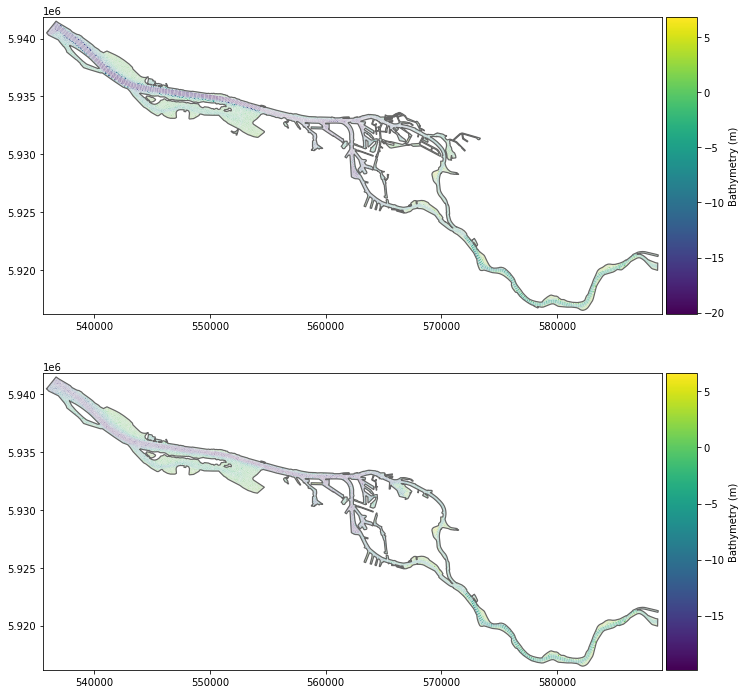

In [6]:
# compare two extreme meshes (included / excluded) 
fig, (axl, axr) = plt.subplots(2,1, figsize=(22,12))

# find simulations with max and min number of elements in dataframe and plot 
mesh_name_maxe = df_meta.iloc[df_meta.Elements.idxmax()].Mesh
msh_maxe = mikeio.Mesh(setupfold.split('*')[0] + mesh_name_maxe)

mesh_name_mine = df_meta.iloc[df_meta.Elements.idxmin()].Mesh
msh_mine = mikeio.Mesh(setupfold.split('*')[0] + mesh_name_mine)


msh_maxe.plot(ax=axl)
msh_mine.plot(ax=axr);

get outputs of model first (assume they do not change between models here)

In [7]:
# just take "leftover" that is in the workspace from above loop
pfs.data.HD.get_outputs()

,file_name,include,type,format,first_time_step,last_time_step,use_end_time,time_step_frequency
1,initial_condition_20160622_1200.dfsu,0,1,2,1440,1440,1,1
2,WaterLevel.dfs0,1,1,0,0,1440,1,1
3,2D.dfsu,1,1,2,0,1440,1,5
4,Velocity.dfs0,1,1,0,0,1440,1,1
5,Teufelsbrueck_Profile.dfs1,1,1,1,0,1440,1,5
6,Finkenwerder_Point.dfs0,1,1,0,0,1440,1,1
7,Finkenwerder_1D_Profile.dfs1,1,1,1,0,1440,1,1


continuing with WaterLevel.dfs0 (**output #2**)

define point observations and combine them with model results

In [8]:
# get all point attributes from output 2
class_att = pfs.data.HD.OUTPUTS.OUTPUT_2

# initialize lists to store 
obs_name, x_list, y_list = [], [], []
for p in dir(class_att):
    # just want point data
    if p.startswith('POINT_'):

        # get attribute POINT_# from class_att
        attr_data = getattr(class_att, p)
        # extract desired attributes
        obs_name.append(attr_data.name)
        x_list.append(attr_data.x)
        y_list.append(attr_data.y)

df_modelobs = pd.DataFrame(list(zip(obs_name, x_list, y_list)),
               columns =['Station', 'x', 'y'])
df_modelobs

,Station,x,y
0,Hetlingen,538360.0,5939843.0
1,Schoepfstelle,570241.0,5929353.0
2,Bunthaus,570755.0,5924175.0
3,DSBunthausNord,571030.0,5923796.0
4,Koehlbrandbruecke,562245.0,5930744.0
5,Harburg,565854.0,5925460.0
6,DSBunthausSued,570828.0,5923536.0
7,Over,573370.0,5920664.0
8,Zollenspieker,578832.0,5917106.0
9,Altengamme,586266.0,5920898.0


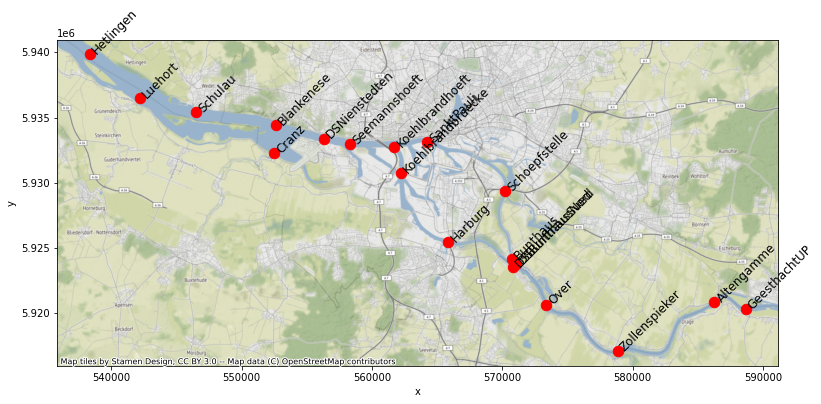

In [9]:
fig, ax = plt.subplots(1,1, figsize=(14,6))

df_modelobs.plot.scatter(x='x', y='y', ax=ax, s=110, c='r')
annotate_scatterplot(df_modelobs, x='x', y='y', acol='Station', c='k', fs=12, rot=45)

# add map while being aware of projection
ctx.add_basemap(ax=ax,crs='EPSG:25832')#, source = ctx.providers.Stamen.Toner)